# Preprocessing

Before starting the analysis part of the project, a little preprocessing has to be done. To start, we create a list with all the stories in it. Next we take apart each token to save only the lemmatized token, and remove unnecessary tokens (such as "/n" or punctuation). 

In [1]:
import os
import glob

# appends to file_list all files inside the particular folder given below that end with ".txt"
file_list = []
for file_name in glob.iglob("data/**/*.txt", recursive=True):
    file_list.append(file_name)

# appends each line of each story to story_list
story_list = []
for file in file_list:
    with open(file, "r", encoding='UTF-8') as story:
        lines = story.readlines()
        story_list.append(lines)  

In [2]:
file_list[:5]

['data/cluster083/253635663-THE-FARMYARD-COCK-AND-THE-WEATHERCOCK-H-C-Andersen.txt',
 'data/cluster083/384500260-THE-BUTTERFLY-H-C-Andersen.txt',
 'data/cluster083/798449202-The-Three-Languages-Brothers-Grimm.txt',
 'data/cluster083/477325002-TWENTY-THIRD-EVENING-H-C-Andersen.txt',
 'data/cluster083/c235.txt']

In [3]:
story_list[0][:10]

['<title>/IN --> IN/IN\n',
 'THE/DT --> the/DT\n',
 'FARMYARD/NNP --> FARMYARD/NNP\n',
 'COCK/NNP --> COCK/NNP\n',
 'AND/CC --> and/CC\n',
 'THE/DT --> the/DT\n',
 'WEATHERCOCK/NNP --> WEATHERCOCK/NNP\n',
 './. --> ./.\n',
 '</title>/NNP --> NNP/NNP\n',
 '<author>/NNP --> NNP/NNP\n']

In [4]:
# removes the first, not letmmatized, instance of each token, and lowercase everything
trimmed_story_list = []
for sentence in story_list:
    for token in sentence:
        if "-->" in token:
            split_token = token.split("-->", 1)[1]
            split_token = split_token.lower()
            trimmed_story_list.append(split_token)
        else:
            continue

In [5]:
trimmed_story_list[0]

' in/in\n'

In [6]:
# removes "/n" from the end of each token
cleaned_list = []
for item in trimmed_story_list:
    new_item = item[:-1]
    cleaned_list.append(new_item)

In [7]:
cleaned_list[:10]

[' in/in',
 ' the/dt',
 ' farmyard/nnp',
 ' cock/nnp',
 ' and/cc',
 ' the/dt',
 ' weathercock/nnp',
 ' ./.',
 ' nnp/nnp',
 ' nnp/nnp']

In [8]:
# adds only relevant tokens to filtered_list: removes tokens that are not word, as well as words irrelevant to our 
# study (such as determinants)
filtered_list=[]
for item in cleaned_list:
    if item.startswith((" .", " ,", " /", " :", " ;", " '", " `", " NNP", " ?", " !", " -")): #numbers? cd
        continue
    elif item.endswith(("CC", "IN", "DT")):
        continue
    else:
        filtered_list.append(item.lstrip())

In [9]:
filtered_list[:10]

['in/in',
 'the/dt',
 'farmyard/nnp',
 'cock/nnp',
 'and/cc',
 'the/dt',
 'weathercock/nnp',
 'nnp/nnp',
 'nnp/nnp',
 'h./nnp']

# Data Exploration

Now we can move on the explore the data. To do so, we'll take a look at the stories themselves and what we can tell from the data before training any model on it.

We start by looking at the most frequent and least frequent words. 

In [10]:
from nltk.probability import FreqDist
frequency_dist = FreqDist(filtered_list)
frequency_dist.most_common(5)

[('the/dt', 527751),
 ('and/cc', 370678),
 ('he/prp', 220124),
 ('to/to', 217260),
 ('a/dt', 158565)]

In [11]:
frequency_dist.most_common()[-5:]

[('straw/vbd', 1),
 ('stranger/vbz', 1),
 ('door-step/nn', 1),
 ('kitchen-sink/jj', 1),
 ('whet/vbz', 1)]

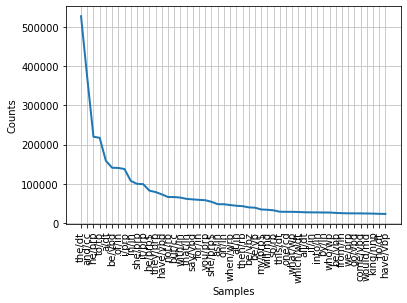

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
frequency_dist.plot(50)

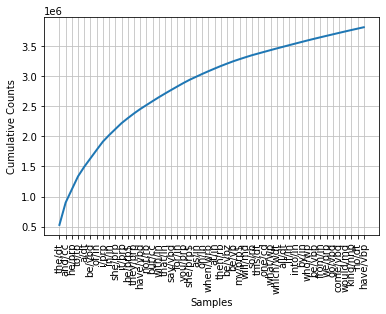

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [13]:
frequency_dist.plot(50, cumulative=True)

Now we can see a few things already. First of all, the most common words still contain stopwords, which will need to be removed to look only at usefull content. Based on the graphs, the stories also follow Zipf's law.

In [14]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

In [15]:
filtered_sentence = []
for token in filtered_list:
    check = token.split("/")[0]
    if not check in stop_words:
        filtered_sentence.append(check)

In [25]:
filtered_sentence

['farmyard',
 'cock',
 'weathercock',
 'nnp',
 'nnp',
 'h.',
 'c.',
 'andersen',
 'nnp',
 'two',
 'cock',
 'one',
 'dunghill',
 'roof',
 'conceit',
 'two',
 'effect',
 'tell',
 'opinion',
 'shall',
 'keep',
 'nevertheless',
 'poultry-yard',
 'divide',
 'partition',
 'board',
 'another',
 'yard',
 'lay',
 'manure-heap',
 'whereon',
 'lay',
 'grow',
 'great',
 'cucumber',
 'fully',
 'conscious',
 'forcing-bed',
 'plant',
 'privilege',
 'birth',
 'cucumber',
 'say',
 'bear',
 'cucumber',
 'must',
 'kind',
 'fowl',
 'duck',
 'cattle',
 'neighbouring',
 'yard',
 'creature',
 'look',
 'yard',
 'cock',
 'partition',
 'certainly',
 'much',
 'greater',
 'consequence',
 'weathercock',
 'highly',
 'place',
 'even',
 'creak',
 'much',
 'less',
 'crow',
 'neither',
 'hen',
 'chicken',
 'think',
 'perspire',
 'verdigris',
 'yard',
 'cock',
 'something',
 'like',
 'cock',
 'gait',
 'like',
 'dance',
 'crowing',
 'music',
 'wherever',
 'come',
 'know',
 'directly',
 'trumpeter',
 'would',
 'come',
 'e

Now that all stopwords have been removed, let's take another look at the frequency distribution

In [17]:
frequency_dist_nostop = FreqDist(filtered_sentence)
frequency_dist_nostop.most_common(10)

[('say', 68639),
 ('go', 48576),
 ('come', 41401),
 ('one', 33532),
 ('king', 30153),
 ('see', 29999),
 ('take', 28773),
 ('thou', 25278),
 ('would', 24053),
 ('give', 22250)]

In [18]:
frequency_dist_nostop.most_common()[-5:]

[('censured', 1), ('141', 1), ('eneke', 1), ('beneke', 1), ('door-step', 1)]

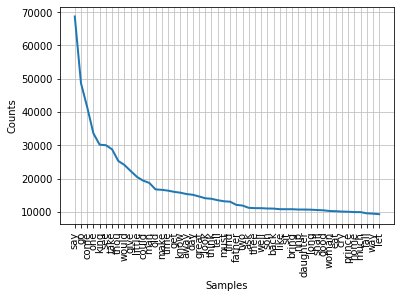

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
frequency_dist_nostop.plot(50)

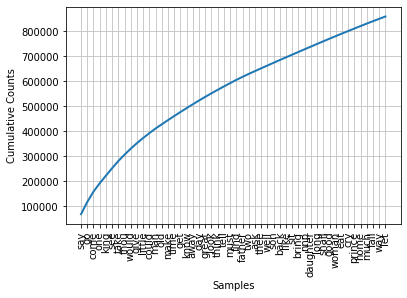

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [20]:
frequency_dist_nostop.plot(50, cumulative=True)

Zipf's law seems like it is still in place. When we look at the top 10 words we can already see something interesting. For example, the word "say" is used most often. If you think about fairy tales this makes sense; most sentences are in the form of "blablabla said the pricess". Lemmatized this is then "say". The other interesting token is "king". Since this token is associated with a specific gender/sex, and is used so often, we can expect that there are certain words associated with this token. 

# Building n-grams

As part of our research, we are using an n-gram model for sentence generation and hope to find that the model is perhaps biased or not. To do so, some code was borrowed and adapted from: https://github.com/olegborisovv/NGram_LanguageModel



In [21]:
test = filtered_sentence[:5]
test

['farmyard', 'cock', 'weathercock', 'nnp', 'nnp']

In [22]:
def get_ngrams(n, tokens):
    """
    :param n: n-gram size
    :param tokens: tokenized sentence
    :return: list of ngrams
    ngrams of tuple form: ((previous wordS!), target word)
    """
    tokens = (n-1)*['<START>']+tokens
    l = [(tuple([tokens[i-p-1] for p in reversed(range(n-1))]), tokens[i]) for i in range(n-1, len(tokens))]
    return l

In [23]:
get_ngrams(3, test)

[(('<START>', '<START>'), 'farmyard'),
 (('<START>', 'farmyard'), 'cock'),
 (('farmyard', 'cock'), 'weathercock'),
 (('cock', 'weathercock'), 'nnp'),
 (('weathercock', 'nnp'), 'nnp')]

I quickly tested the funtion above to see if it indeed works as it is supposed to. 

For this part of the assignment, an additional dataset was used; the anderongrimm.txt file in the repositor contains stories of Anderson and Grimm and is not preprocessed. 

In [24]:
import string
import random
import time
from typing import List

# ideally we would use some smart text tokenizer, but for simplicity use this one
def tokenize(text: str) -> List[str]:
    """
    :param text: Takes input sentence
    :return: tokenized sentence
    """
    for punct in string.punctuation:
        text = text.replace(punct, ' '+punct+' ')
    t = text.split()
    return t

def get_ngrams(n: int, tokens: list) -> list:
    """
    :param n: n-gram size
    :param tokens: tokenized sentence
    :return: list of ngrams
    ngrams of tuple form: ((previous wordS!), target word)
    """
    # tokens.append('<END>')
    tokens = (n-1)*['<START>']+tokens
    l = [(tuple([tokens[i-p-1] for p in reversed(range(n-1))]), tokens[i]) for i in range(n-1, len(tokens))]
    return l


class NgramModel(object):

    def __init__(self, n):
        self.n = n

        # dictionary that keeps list of candidate words given context
        self.context = {}

        # keeps track of how many times ngram has appeared in the text before
        self.ngram_counter = {}

    def update(self, sentence: str) -> None:
        """
        Updates Language Model
        :param sentence: input text
        """
        n = self.n
        ngrams = get_ngrams(n, tokenize(sentence))
        for ngram in ngrams:
            if ngram in self.ngram_counter:
                self.ngram_counter[ngram] += 1.0
            else:
                self.ngram_counter[ngram] = 1.0

            prev_words, target_word = ngram
            if prev_words in self.context:
                self.context[prev_words].append(target_word)
            else:
                self.context[prev_words] = [target_word]

    def prob(self, context, token):
        """
        Calculates probability of a candidate token to be generated given a context
        :return: conditional probability
        """
        try:
            count_of_token = self.ngram_counter[(context, token)]
            count_of_context = float(len(self.context[context]))
            result = count_of_token / count_of_context

        except KeyError:
            result = 0.0
        return result

    def random_token(self, context):
        """
        Given a context we "semi-randomly" select the next word to append in a sequence
        :param context:
        :return:
        """
        r = random.random()
        map_to_probs = {}
        token_of_interest = self.context[context]
        for token in token_of_interest:
            map_to_probs[token] = self.prob(context, token)

        summ = 0
        for token in sorted(map_to_probs):
            summ += map_to_probs[token]
            if summ > r:
                return token

    def generate_text(self, token_count: int):
        """
        :param token_count: number of words to be produced
        :return: generated text
        """
        n = self.n
        context_queue = (n - 1) * ['<START>']
        result = []
        for _ in range(token_count):
            obj = self.random_token(tuple(context_queue))
            result.append(obj)
            if n > 1:
                context_queue.pop(0)
                if obj == '.':
                    context_queue = (n - 1) * ['<START>']
                else:
                    context_queue.append(obj)
        return ' '.join(result)


def create_ngram_model(n, path):
    m = NgramModel(n)
    with open(path, 'r') as f:
        text = f.read()
        text = text.split('.')
        for sentence in text:
            # add back the fullstop
            sentence += '.'
            m.update(sentence)
    return m

if __name__ == "__main__":
    for n in range(8):
        start = time.time()
        m = create_ngram_model(8, 'andersongrimm.txt')
        #print(f'n = {n}')
        #print (f'Language Model creating time: {time.time() - start}')
        start = time.time()
        random.seed(n)
        #print('Generated text:')
        print(m.generate_text(200))
        print(f'{"="*50}')

Then the king ' s son waited till her father came home , and told him that the unknown maiden who had been at the feast had hidden herself in the pigeon - house . " That is the tune I know , " she exclaimed . Jurgen did not understand the reason of this , but he thought it would be best to turn back , and therefore he himself took an oar and returned . They were telling each other where they had been during the day . Yes , he must be there . " Oh , now I have no horse at all , " said Little Claus , weeping . It was , in this transformation , as if two natures were striving together within her ; her whole frame trembled , and she looked around her as if she had just awoke from a painful dream . Sleep was still in his eyes , but yet he crowed out : " Three hens have died of their unfortunate love for a cock . With the rod knock thrice at the iron door of the castle , and it will spring open . She bent
" They say at home , " said the little boy , taking it up and looking at it . " Just th

As can be seen, the model is able to generate some texts, which do have some biases in them; "at home the beautiful wife prayed...."

# Showing frequent bigrams

Now we'll look at some bigrams and see if there are some obvious biases associated with gender. The code to generate the graph below is from: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [37]:
# Create list of lists containing bigrams our processed list of stories
terms_bigram = list(bigrams(filtered_sentence))
terms_bigram[0:10]

[('farmyard', 'cock'),
 ('cock', 'weathercock'),
 ('weathercock', 'nnp'),
 ('nnp', 'nnp'),
 ('nnp', 'h.'),
 ('h.', 'c.'),
 ('c.', 'andersen'),
 ('andersen', 'nnp'),
 ('nnp', 'two'),
 ('two', 'cock')]

In [38]:
# Create counter of words in bigrams
bigram_counts = collections.Counter(terms_bigram)

bigram_counts.most_common(20)

[(('old', 'woman'), 5115),
 (('king', 'son'), 4249),
 (('king', 'daughter'), 3504),
 (('go', 'away'), 3315),
 (('thou', 'hast'), 3149),
 (('nnp', 'nnp'), 2991),
 (('old', 'man'), 2958),
 (('thou', 'art'), 2710),
 (('brother', 'lustig'), 2418),
 (('thou', 'wilt'), 2289),
 (('one', 'day'), 2271),
 (('next', 'morning'), 2248),
 (('come', 'back'), 2215),
 (('nnp', 'brothers'), 2169),
 (('brothers', 'grimm'), 2169),
 (('say', 'thou'), 2075),
 (('thou', 'shalt'), 2074),
 (('grimm', 'nnp'), 2053),
 (('go', 'home'), 2033),
 (('st.', 'peter'), 2017)]

In [45]:
bigram_df = pd.DataFrame(bigram_counts.most_common(200),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0        (old, woman)   5115
1         (king, son)   4249
2    (king, daughter)   3504
3          (go, away)   3315
4        (thou, hast)   3149
..                ...    ...
195    (gold, silver)    438
196       (wife, say)    436
197   (know, nothing)    435
198    (leave, alone)    435
199       (come, see)    435

[200 rows x 2 columns]

In [46]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [47]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


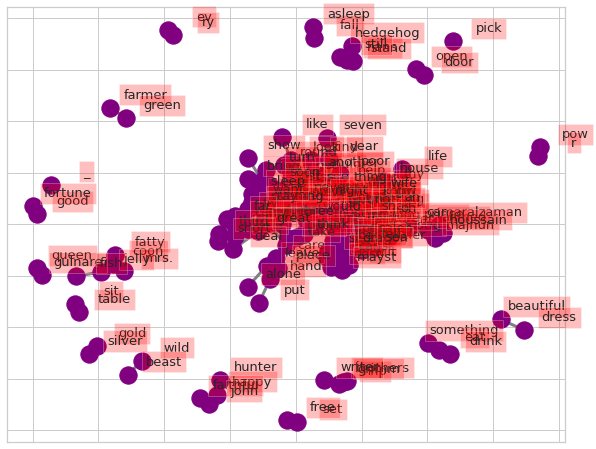

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [54]:
def select_bigrams(bigrams_list, token_list):
    selected_bigrams = []
    for tup in bigrams_list:
        for token in token_list:
            if token in tup:
                selected_bigrams.append(tup)
    return selected_bigrams

In [77]:
token_list = ["wife", "husband", "son", "daughter", "king", "queen", "prince", "princess", "brother", "sister", "mother", "father", "woman", "man", "lady", "gentleman", "gentlemen", "maiden", "girl", "boy"]
token_list_male = ["husband", "son", "king", "prince", "brother", "father", "man", "gentleman", "gentlemen", "bachelor", "boy"]
token_list_female = ["wife", "daughter", "queen", "princess", "sister", "mother", "woman", "lady", "maiden", "girl"]

In [78]:
selection_full = select_bigrams(terms_bigram, token_list)
selection_female = select_bigrams(terms_bigram, token_list_female)
selection_male = select_bigrams(terms_bigram, token_list_male)

In [79]:
selection_female[:20]

[('stalk', 'maiden'),
 ('maiden', 'ought'),
 ('wisest', 'woman'),
 ('woman', 'among'),
 ('call', 'woman'),
 ('woman', 'yet'),
 ('yet', 'girl'),
 ('girl', 'great'),
 ('elder', 'girl'),
 ('girl', 'fly'),
 ('domestic', 'maiden'),
 ('maiden', 'look'),
 ('close', 'maiden'),
 ('maiden', 'see'),
 ('ask', 'sister'),
 ('sister', 'reply'),
 ('number', 'girl'),
 ('girl', 'like'),
 ('butterfly', 'wife'),
 ('wife', 'long')]

In [80]:
selection_male[:20]

[('basilisk', 'man'),
 ('man', 'know'),
 ('old', 'bachelor'),
 ('bachelor', 'late'),
 ('switzerland', 'son'),
 ('son', 'stupid'),
 ('say', 'father'),
 ('father', 'hark'),
 ('thee', 'son'),
 ('son', 'get'),
 ('home', 'father'),
 ('father', 'ask'),
 ('ask', 'son'),
 ('son', 'hast'),
 ('learn', 'father'),
 ('father', 'learn'),
 ('cry', 'father'),
 ('father', 'thou'),
 ('back', 'father'),
 ('father', 'ask')]

In [81]:
counts = collections.Counter(selection)
counts.most_common(20)

[(('king', 'son'), 8498),
 (('king', 'daughter'), 7008),
 (('old', 'woman'), 5115),
 (('old', 'man'), 2958),
 (('brother', 'lustig'), 2418),
 (('say', 'king'), 1615),
 (('king', 'say'), 1598),
 (('father', 'mother'), 1192),
 (('say', 'father'), 1176),
 (('prince', 'ahmed'), 1111),
 (('king', 'persia'), 936),
 (('young', 'man'), 888),
 (('say', 'man'), 835),
 (('man', 'say'), 815),
 (('daughter', 'wife'), 770),
 (('king', 'queen'), 764),
 (('say', 'brother'), 728),
 (('queen', 'mother'), 722),
 (('king', 'father'), 704),
 (('king', 'beder'), 672)]

In [82]:
counts_female = collections.Counter(selection_female)
counts_female.most_common(20)

[(('old', 'woman'), 5115),
 (('king', 'daughter'), 3504),
 (('daughter', 'wife'), 770),
 (('queen', 'mother'), 722),
 (('mother', 'say'), 616),
 (('daughter', 'say'), 613),
 (('father', 'mother'), 596),
 (('queen', 'gulnare'), 560),
 (('woman', 'say'), 551),
 (('woman', 'come'), 485),
 (('little', 'girl'), 484),
 (('say', 'girl'), 472),
 (('say', 'mother'), 466),
 (('wife', 'say'), 436),
 (('say', 'wife'), 431),
 (('beautiful', 'maiden'), 409),
 (('king', 'queen'), 382),
 (('give', 'daughter'), 379),
 (('go', 'mother'), 363),
 (('say', 'maiden'), 362)]

In [83]:
counts_male = collections.Counter(selection_male)
counts_male.most_common(20)

[(('king', 'son'), 8498),
 (('king', 'daughter'), 3504),
 (('old', 'man'), 2958),
 (('brother', 'lustig'), 2418),
 (('say', 'king'), 1615),
 (('king', 'say'), 1598),
 (('say', 'father'), 1176),
 (('prince', 'ahmed'), 1111),
 (('king', 'persia'), 936),
 (('young', 'man'), 888),
 (('say', 'man'), 835),
 (('man', 'say'), 815),
 (('say', 'brother'), 728),
 (('king', 'father'), 704),
 (('king', 'beder'), 672),
 (('vizier', 'son'), 661),
 (('king', 'saleh'), 624),
 (('dragon', 'king'), 621),
 (('son', 'king'), 600),
 (('father', 'mother'), 596)]

Based on what we can see of the bigrams, there is not much bias to be found. Apparently it is common to have and old man or woman and an ill queen or king, but there is not much to say for strict biases. The only bigram that could be considered a bias is the "beautiful maidens". 